# Compute the density of waves over the entire DUNEX experiment

In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
import numpy as np
from scipy import stats

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
mission_list = glob.glob('../microSWIFT_data/final_dataset/mission_*.nc')
bathy_file = '../microSWIFT_data/FRFdata/' \
             'FRF_geomorphology_DEMs_surveyDEM_20211021.nc'

In [3]:
wave_x_locs_all = []
wave_y_locs_all = []

for mission_nc in mission_list:
    mission_dataset = nc.Dataset(mission_nc, mode='r')

    x_locations = mission_dataset['xFRF'][:]
    y_locations = mission_dataset['yFRF'][:]
    eta = mission_dataset['sea_surface_elevation'][:]
    time = mission_dataset['time'][:]

    wave_heights, \
    wave_x_locs, \
    wave_y_locs = mission_tools.compute_individual_waves(x_locations,
                                                        y_locations,
                                                        eta, time,
                                                        bathy_file)

    indices = np.logical_not(np.logical_or(np.isnan(wave_x_locs),
                                            np.isnan(wave_y_locs)))     
    indices = np.array(indices)
    wave_x_locs = np.array(wave_x_locs)[indices]
    wave_y_locs = np.array(wave_y_locs)[indices]

    wave_x_locs_all.append(wave_x_locs)
    wave_y_locs_all.append(wave_y_locs)

wave_x_locs_all = np.concatenate(wave_x_locs_all).flatten()
wave_y_locs_all = np.concatenate(wave_y_locs_all).flatten()

print(f'Total Number of Waves Measured: {wave_x_locs_all.size}')

Total Number of Waves Measured: 116307


## Plot the density of all individual waves 

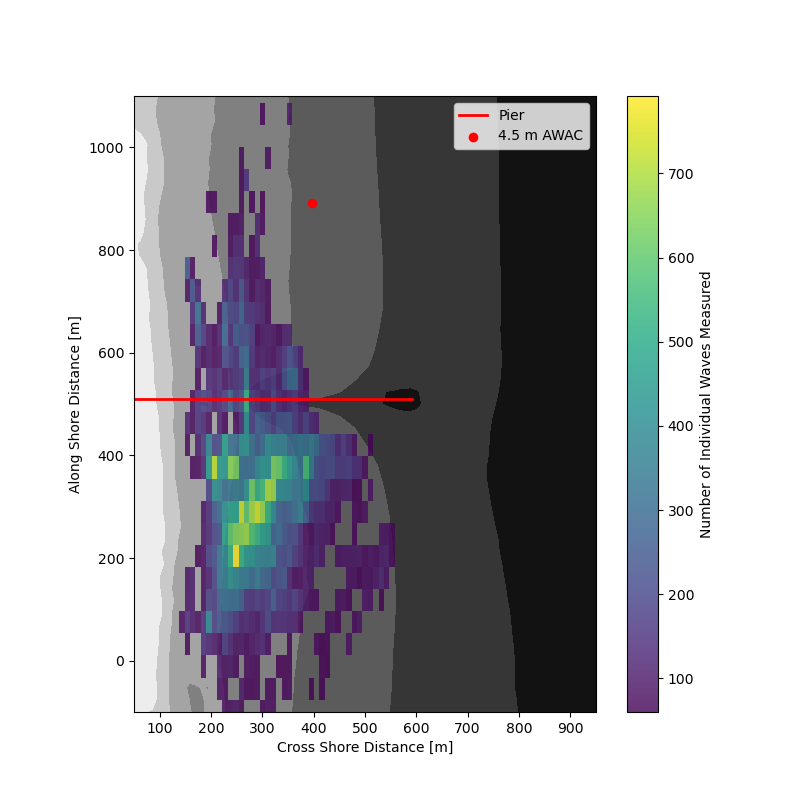

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

bathy_dataset = nc.Dataset(bathy_file)
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],
                                    bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
ax.contourf(xFRF_grid, yFRF_grid, bathy, cmap='gray')
h, x_edge, y_edge, map = ax.hist2d(wave_x_locs_all,
                wave_y_locs_all,
                bins=50, cmap='viridis', alpha=0.8, cmin=60)
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Number of Individual Waves Measured')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier') # coordinates of pier
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations 
                                     # published on FRF data portal
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
           color='r', label='4.5 m AWAC')

ax.set_xlim([np.min(xFRF_grid), np.max(xFRF_grid)])
ax.set_ylim([np.min(yFRF_grid), np.max(yFRF_grid)])
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.set_aspect('equal')
ax.legend()

bathy_dataset.close()

In [7]:
print(np.diff(x_edge))
print(np.diff(y_edge))

[10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828]
[43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 